In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
air_quality_2019 = pd.read_csv('./Air_Quality/ad_viz_plotval_data_2019.csv')
air_quality_2019 = air_quality_2019.loc[:, ['Date', 'Daily Mean PM2.5 Concentration']]
air_quality_2019.head()

,Date,Daily Mean PM2.5 Concentration
0,01/03/2019,5.3
1,01/06/2019,5.9
2,01/09/2019,3.0
3,01/12/2019,4.3
4,01/15/2019,12.0


In [3]:
air_quality_2019['Date'] = pd.to_datetime(air_quality_2019['Date'])
air_quality_2019 = air_quality_2019.set_index('Date', drop=True)
air_quality_2019.head()

,Daily Mean PM2.5 Concentration
Date,
2019-01-03,5.3
2019-01-06,5.9
2019-01-09,3.0
2019-01-12,4.3
2019-01-15,12.0


In [4]:
air_quality_2019 = air_quality_2019.resample(rule='M').mean()
air_quality_2019.head()

,Daily Mean PM2.5 Concentration
Date,
2019-01-31,9.356051
2019-02-28,9.153846
2019-03-31,7.777019
2019-04-30,5.877622
2019-05-31,5.428477


In [5]:
air_quality_2020 = pd.read_csv('./Air_Quality/ad_viz_plotval_data_2020.csv')
air_quality_2020 = air_quality_2020.loc[:, ['Date', 'Daily Mean PM2.5 Concentration']]
air_quality_2020.head()

,Date,Daily Mean PM2.5 Concentration
0,01/01/2020,1.9
1,01/04/2020,9.6
2,01/07/2020,5.0
3,01/10/2020,5.2
4,01/13/2020,4.0


In [6]:
air_quality_2020['Date'] = pd.to_datetime(air_quality_2020['Date'])
air_quality_2020 = air_quality_2020.set_index('Date', drop=True)
air_quality_2020.head()

,Daily Mean PM2.5 Concentration
Date,
2020-01-01,1.9
2020-01-04,9.6
2020-01-07,5.0
2020-01-10,5.2
2020-01-13,4.0


In [7]:
air_quality_2020 = air_quality_2020.resample(rule='M').mean()
air_quality_2020.head()

,Daily Mean PM2.5 Concentration
Date,
2020-01-31,7.973206
2020-02-29,7.375887
2020-03-31,5.068677
2020-04-30,4.243284
2020-05-31,3.777638


In [8]:
air_quality_total =pd.concat([air_quality_2019, air_quality_2020], keys=['2019yr', '2020yr'])
air_quality_total.head()

Daily Mean PM2.5 Concentration
       Date                                      
2019yr 2019-01-31                        9.356051
       2019-02-28                        9.153846
       2019-03-31                        7.777019
       2019-04-30                        5.877622
       2019-05-31                        5.428477

In [9]:
air_quality_total['year'] = [2019]*12 + [2020]*12
table = pd.pivot_table(air_quality_total, values='Daily Mean PM2.5 Concentration', columns=['year'],
                        aggfunc=np.mean)
table

year,2019,2020
Daily Mean PM2.5 Concentration,7.098749,5.985835


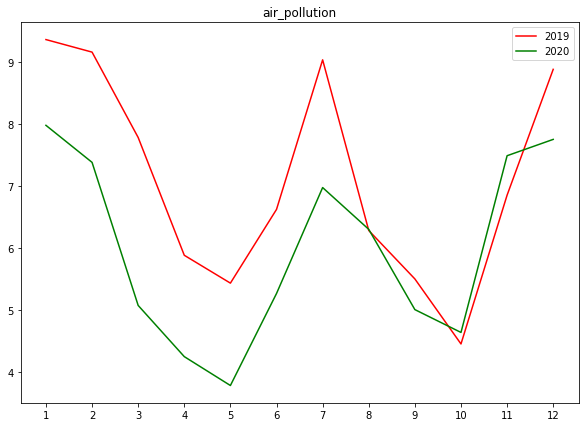

In [10]:
f, ax = plt.subplots(figsize = (10, 7))

x1 = list(range(1, 13, 1))
y1 = air_quality_total.loc['2019yr', 'Daily Mean PM2.5 Concentration']
y2 = air_quality_total.loc['2020yr', 'Daily Mean PM2.5 Concentration']
plt.plot(x1, y1, color = 'red', label='2019')
plt.plot(x1, y2, color = 'green', label='2020')
ax.set_title('air_pollution')
ax.set_xticks(x1)
ax.legend()

plt.show()